In [2]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [7]:
summary = pd.read_excel('cnn_rnn_lite_roberta_precision_recall_f1.xlsx', sheet_name='Sheet1', header=0, engine='openpyxl',)

In [8]:
summary

,Method,Class,Metric,Score
0,RNN,0,Precision,0.983858
1,RNN,0,Recall,0.947544
2,RNN,0,F1,0.965360
3,RNN,1,Precision,0.960307
4,RNN,1,Recall,0.987898
5,RNN,1,F1,0.973907
6,CNN,0,Precision,0.988724
7,CNN,0,Recall,0.919757
8,CNN,0,F1,0.952995
9,CNN,1,Precision,0.940753


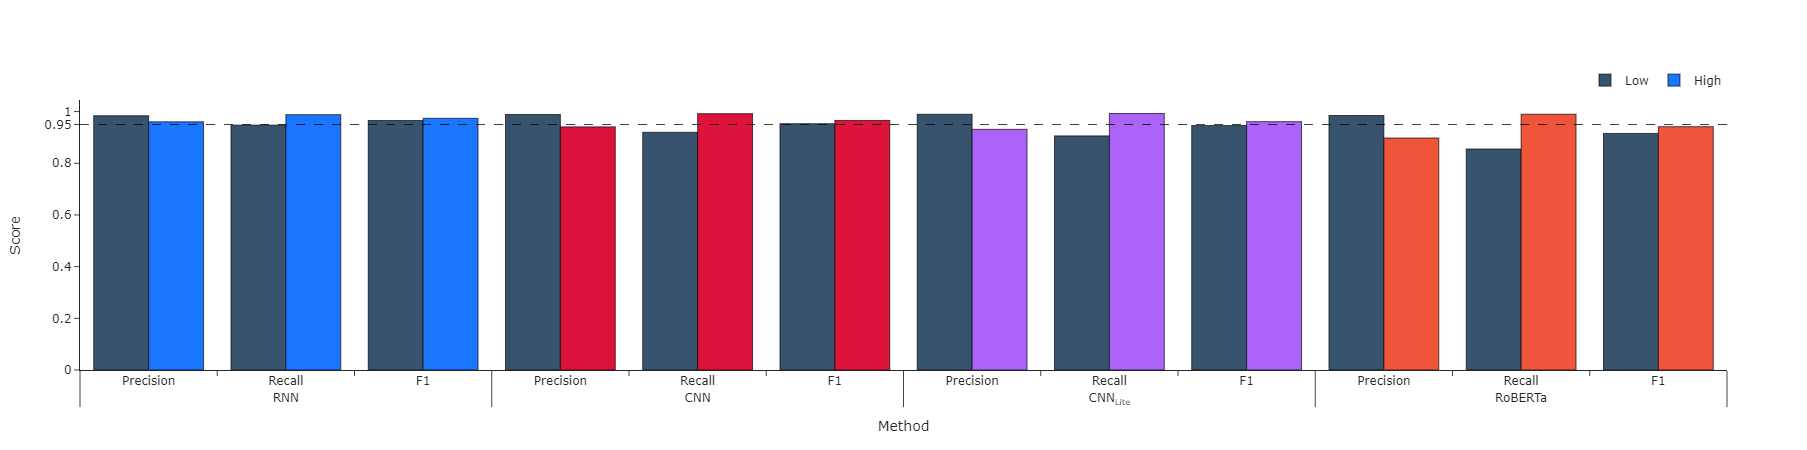

In [10]:
fig = go.Figure()

fig.update_layout(
    template='simple_white',
    xaxis=dict(title_text='Method'),
    yaxis=dict(title_text='Score'),
)

fig.add_hline(y=0.95, line_width=0.75, line_dash="dash", line_color="black", opacity=1)

colors_1 = ['rgb(55, 83, 109)'] * 12
colors_2 = ['rgb(26, 118, 255)'] * 3 + ['crimson'] * 3 + ['#AB63FA'] * 3 + ['#EF553B'] * 3

classes = ['Low', 'High']

for i, lbl in enumerate(classes):
    if not pd.isnull(lbl):
        plot_df = summary[summary.Class == i]
        fig.add_trace(
            go.Bar(x=[plot_df.Method, plot_df.Metric], y=plot_df.Score, name=str(lbl), marker_color=colors_1 if i == 0 else colors_2, base=0, marker_line_color='rgb(0, 0, 0)', showlegend=True),
    )
        

fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

fig.update_yaxes(tickvals=[0, 0.2, 0.4, 0.6, 0.8, 0.95, 1])
fig.show()
fig.write_image('plot.svg', engine="kaleido")